<a href="https://colab.research.google.com/github/manasik29/KNearestNeighbors/blob/main/KNearestNeighbors_glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

**Prepare a model for glass classification using KNN**

**Data Description:**

- RI : refractive index

- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

- Mg: Magnesium

- AI: Aluminum

- Si: Silicon

- K:Potassium

- Ca: Calcium

- Ba: Barium

- Fe: Iron

**Type: Type of glass: (class attribute)**

1 -- building_windows_float_processed
 
2 --building_windows_non_float_processed

3 --vehicle_windows_float_processed

4 --vehicle_windows_non_float_processed (none in this database)

5 --containers

6 --tableware

7 --headlamps

**Load Data & Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv('/content/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [4]:
data.shape

(214, 10)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


**EDA**

In [6]:
#check for missing values
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

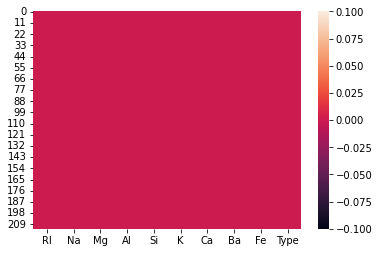

In [26]:
sns.heatmap(data.isna())

In [8]:
#check for duplicate values
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
#check if any incorrect data type
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

- We can conclude there is no missing values in our data.

- All the columns data types are correct.

- There is one duplicate value in our data, we will drop the value while data preprocessing.

In [10]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [12]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7])

In [13]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

**Data Visualisation**

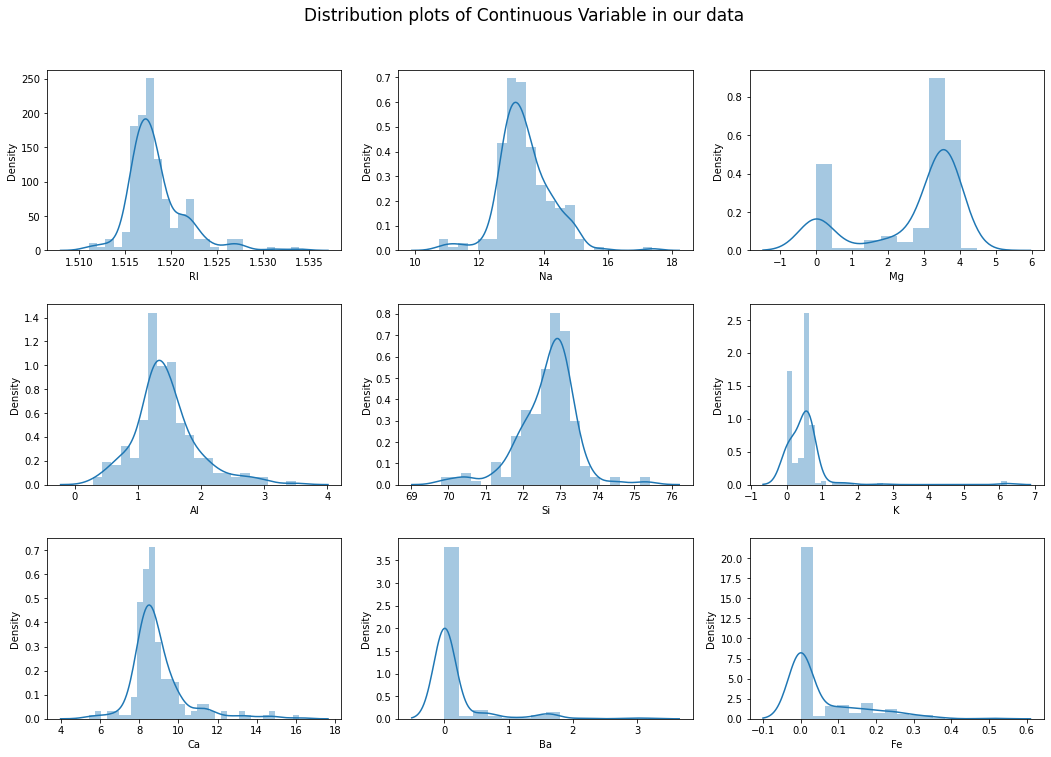

In [28]:
#Univariate Analysis

fig, ax=plt.subplots(3, 3,figsize=(15,10),sharex=False,sharey=False)
sns.distplot(data.RI, ax=ax[0,0])
sns.distplot(data.Na, ax=ax[0,1])
sns.distplot(data.Mg, ax=ax[0,2])
sns.distplot(data.Al, ax=ax[1,0])
sns.distplot(data.Si, ax=ax[1,1])
sns.distplot(data.K, ax=ax[1,2])
sns.distplot(data.Ca, ax=ax[2,0])
sns.distplot(data.Ba, ax=ax[2,1])
sns.distplot(data.Fe, ax=ax[2,2])
plt.suptitle("Distribution plots of Continuous Variable in our data", fontsize = 17, y =1.06)
plt.tight_layout(pad=2.0)

- There are definitely outliers in Fe, Ba, K.

- Ca, Al, Si, Ri, Na are fairly Normally distributed.

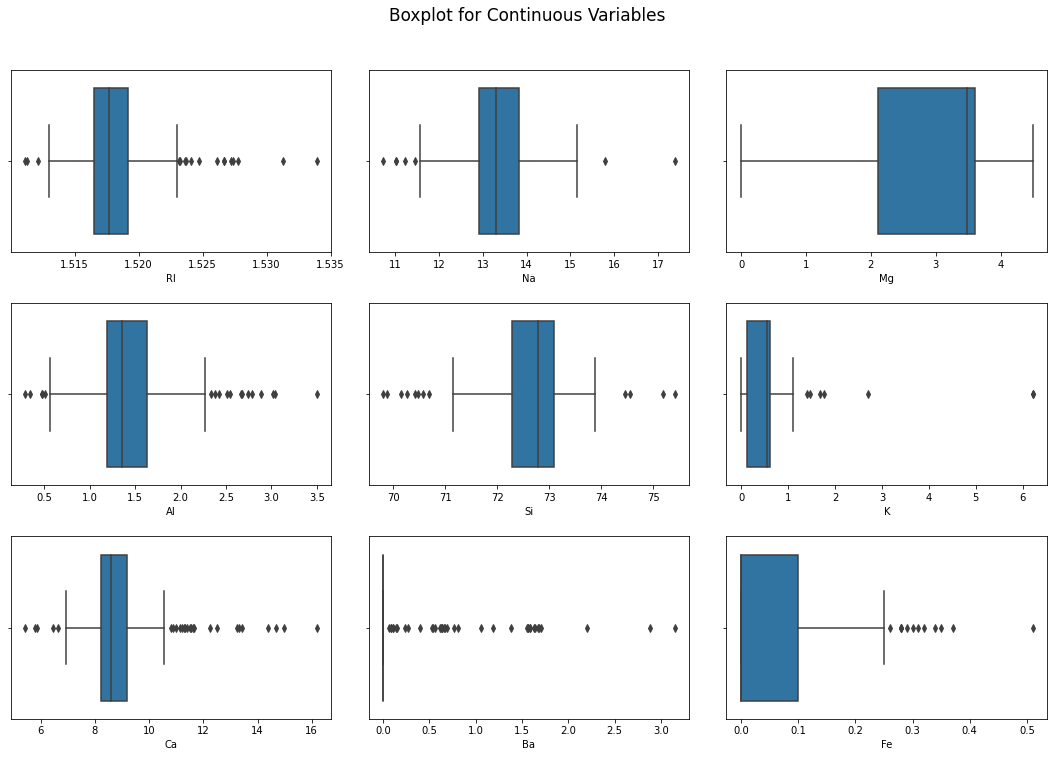

In [31]:
#check for outliers by boxplot
fig, ax=plt.subplots(3,3, figsize=(15,10), sharex= False, sharey = False)
sns.boxplot(data.RI, ax=ax[0,0])
sns.boxplot(data.Na, ax=ax[0,1])
sns.boxplot(data.Mg, ax=ax[0,2])
sns.boxplot(data.Al, ax=ax[1,0])
sns.boxplot(data.Si, ax=ax[1,1])
sns.boxplot(data.K, ax=ax[1,2])
sns.boxplot(data.Ca, ax=ax[2,0])
sns.boxplot(data.Ba, ax=ax[2,1])
sns.boxplot(data.Fe, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

- Our data is very Noisy.

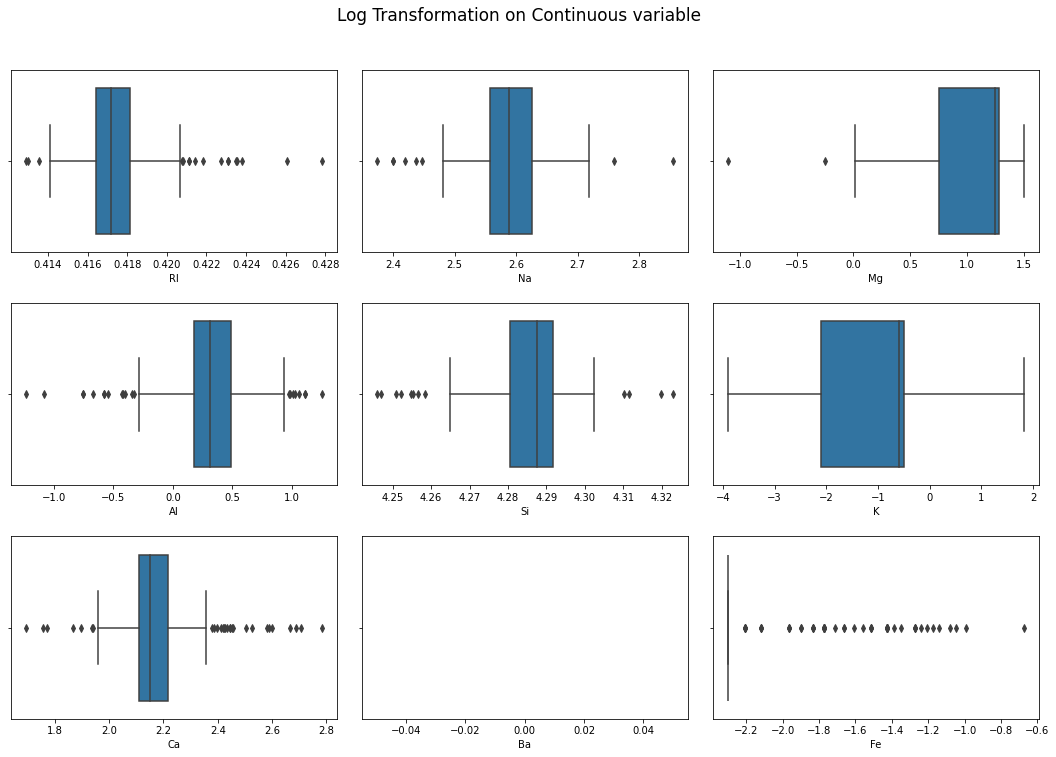

In [34]:
#Let us try log, sqrt and cbrt tranformation on our data
fig, axes=plt.subplots(3,3, figsize=(15,10), sharex=False, sharey=False)
sns.boxplot(np.log(data.RI), ax=axes[0,0])
sns.boxplot(np.log(data.Na), ax=axes[0,1])
sns.boxplot(np.log(data.Mg), ax=axes[0,2])
sns.boxplot(np.log(data.Al), ax=axes[1,0])
sns.boxplot(np.log(data.Si), ax=axes[1,1])
sns.boxplot(np.log(data.K), ax=axes[1,2])
sns.boxplot(np.log(data.Ca), ax=axes[2,0])
sns.boxplot(np.log(data.Ba), ax=axes[2,1])
sns.boxplot(np.log(data.Fe), ax=axes[2,2])
plt.suptitle("Log Transformation on Continuous variable", fontsize =17, y = 1.06)
plt.tight_layout(pad=2.0)

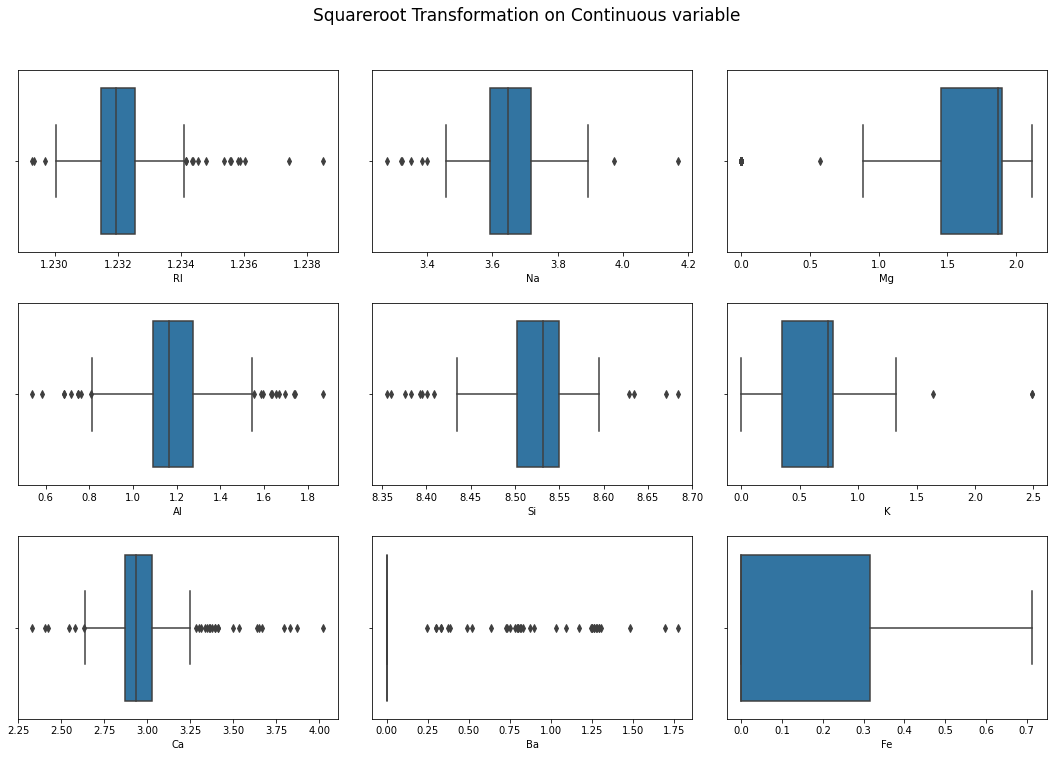

In [38]:
fig, axes=plt.subplots(3,3, figsize=(15,10), sharex=False, sharey=False)
sns.boxplot(np.sqrt(data.RI), ax=axes[0,0])
sns.boxplot(np.sqrt(data.Na), ax=axes[0,1])
sns.boxplot(np.sqrt(data.Mg), ax=axes[0,2])
sns.boxplot(np.sqrt(data.Al), ax=axes[1,0])
sns.boxplot(np.sqrt(data.Si), ax=axes[1,1])
sns.boxplot(np.sqrt(data.K), ax=axes[1,2])
sns.boxplot(np.sqrt(data.Ca), ax=axes[2,0])
sns.boxplot(np.sqrt(data.Ba), ax=axes[2,1])
sns.boxplot(np.sqrt(data.Fe), ax=axes[2,2])
plt.suptitle("Squareroot Transformation on Continuous variable", fontsize =17, y = 1.06)
plt.tight_layout(pad=2.0)

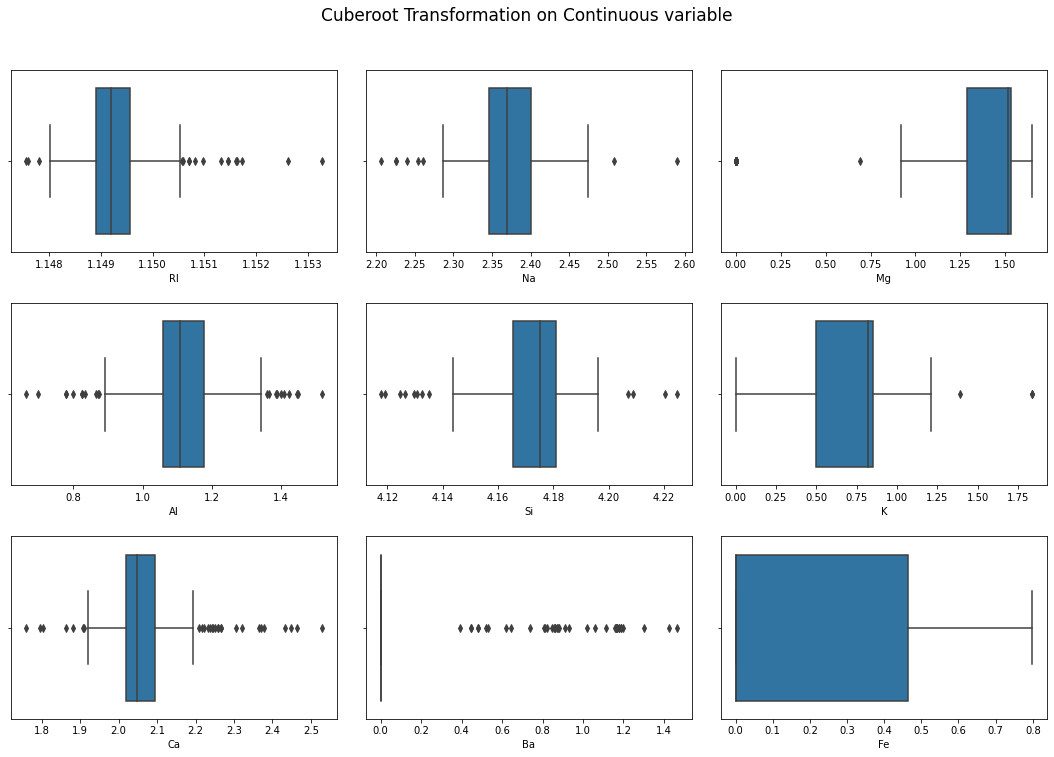

In [37]:
fig, axes=plt.subplots(3,3, figsize=(15,10), sharex=False, sharey=False)
sns.boxplot(np.cbrt(data.RI), ax=axes[0,0])
sns.boxplot(np.cbrt(data.Na), ax=axes[0,1])
sns.boxplot(np.cbrt(data.Mg), ax=axes[0,2])
sns.boxplot(np.cbrt(data.Al), ax=axes[1,0])
sns.boxplot(np.cbrt(data.Si), ax=axes[1,1])
sns.boxplot(np.cbrt(data.K), ax=axes[1,2])
sns.boxplot(np.cbrt(data.Ca), ax=axes[2,0])
sns.boxplot(np.cbrt(data.Ba), ax=axes[2,1])
sns.boxplot(np.cbrt(data.Fe), ax=axes[2,2])
plt.suptitle("Cuberoot Transformation on Continuous variable", fontsize =17, y = 1.06)
plt.tight_layout(pad=2.0)

- None of the transformation is helpful in treating outliers.

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


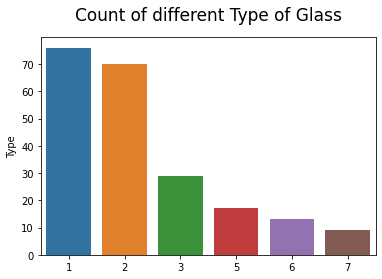

In [43]:
#visualisation of categorical variable
sns.barplot(x=data.Type.unique(), y = data.Type.value_counts())
plt.title("Count of different Type of Glass", fontsize =17, y = 1.05)
print(data.Type.value_counts())

The % of each Type of glass in data:
 2    35.514019
1    32.710280
7    13.551402
3     7.943925
5     6.074766
6     4.205607
Name: Type, dtype: float64


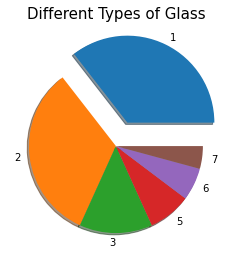

In [58]:
plt.pie(data.Type.value_counts(), labels=data.Type.unique() , explode=(0.3,0,0,0,0,0), shadow=True, )
plt.title("Different Types of Glass", fontsize=15, y= 1.06)
print('The % of each Type of glass in data:\n',(data.Type.value_counts()/214)*100)

- Max num of data is of glass type 1.

- Min num of data is of glass type 6.

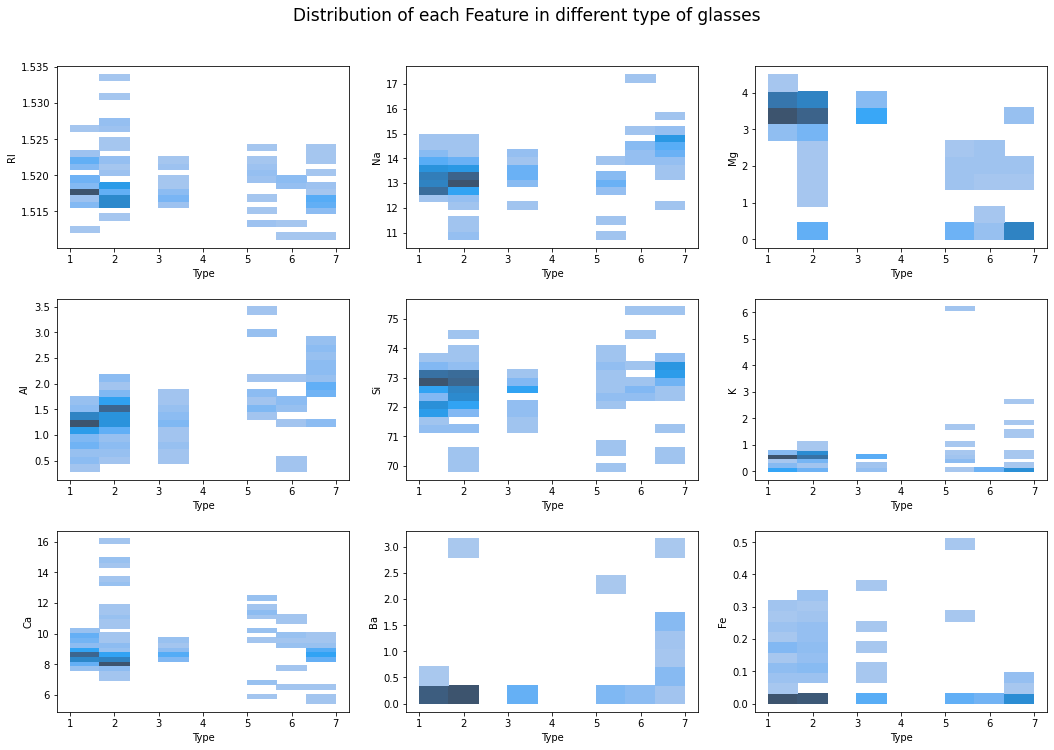

In [132]:
#Multivariate Analysis
fig, ax=plt.subplots(3,3, figsize=(15,10), sharex = False, sharey=False)
sns.histplot(x=data.Type, y=data.RI, ax=ax[0,0])
sns.histplot(x=data.Type, y=data.Na, ax=ax[0,1])
sns.histplot(x=data.Type, y=data.Mg, ax=ax[0,2])
sns.histplot(x=data.Type, y=data.Al, ax=ax[1,0])
sns.histplot(x=data.Type, y=data.Si, ax=ax[1,1])
sns.histplot(x=data.Type, y=data.K, ax=ax[1,2])
sns.histplot(x=data.Type, y=data.Ca, ax=ax[2,0])
sns.histplot(x=data.Type, y=data.Ba, ax=ax[2,1])
sns.histplot(x=data.Type, y=data.Fe, ax=ax[2,2])
plt.suptitle("Distribution of each Feature in different type of glasses", fontsize=17, y = 1.05)
plt.tight_layout(pad=2.0)

- All glasses have almost similar Average Refractive Index(RI).

- All glasses have very high content of Ca, Na, Si.

- Average Ba content in glasses 1,2,3,6 is very low. 

- Average Fe content in glasses 6,7 is very low. 

- Average K content in glasses 1,2,3,6,7 is comparitively low.

- Average Mg content in 5, 7 is comparitively low.

In [ ]:
df = pd.DataFrame(data = data[data.Type==1].mean(), index=data.columns)
df = df.drop('Type', axis=0)

Text(0, 0.5, 'Content')

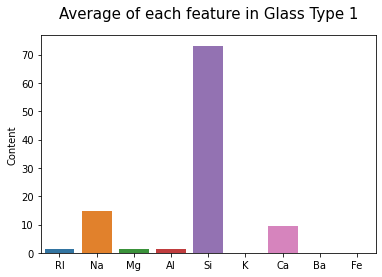

In [121]:
plt.title("Average of each feature in Glass Type 1", y=1.05, fontsize=15)
sns.barplot(x=df.index, y=df.iloc[:,0])
plt.ylabel('Content')

Text(0, 0.5, 'Content')

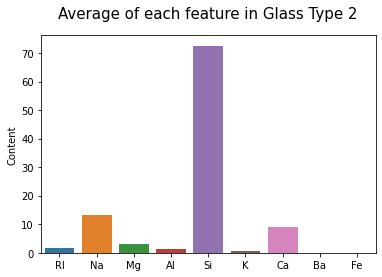

In [122]:
df1 = pd.DataFrame(data = data[data.Type==2].mean(), index=data.columns)
df1 = df1.drop('Type', axis=0)
plt.title("Average of each feature in Glass Type 2", y=1.05, fontsize=15)
sns.barplot(x=df1.index, y=df1.iloc[:,0])
plt.ylabel('Content')

Text(0, 0.5, 'Content')

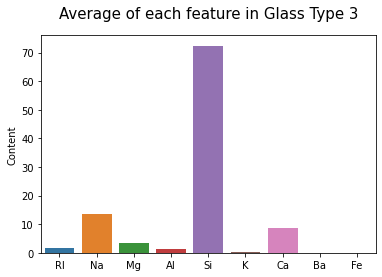

In [123]:
df2 = pd.DataFrame(data = data[data.Type==3].mean(), index=data.columns)
df2 = df2.drop('Type', axis=0)
plt.title("Average of each feature in Glass Type 3", y=1.05, fontsize=15)
sns.barplot(x=df2.index, y=df2.iloc[:,0])
plt.ylabel('Content')

Text(0, 0.5, 'Content')

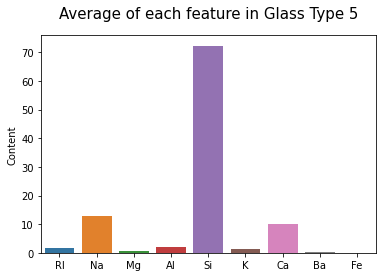

In [124]:
df3 = pd.DataFrame(data = data[data.Type==5].mean(), index=data.columns)
df3 = df3.drop('Type', axis=0)
plt.title("Average of each feature in Glass Type 5", y=1.05, fontsize=15)
sns.barplot(x=df3.index, y=df3.iloc[:,0])
plt.ylabel('Content')

Text(0, 0.5, 'Content')

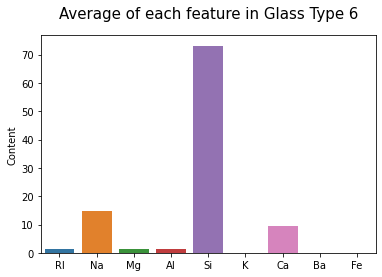

In [125]:
df4 = pd.DataFrame(data = data[data.Type==6].mean(), index=data.columns)
df4 = df4.drop('Type', axis=0)
plt.title("Average of each feature in Glass Type 6", y=1.05, fontsize=15)
sns.barplot(x=df4.index, y=df4.iloc[:,0])
plt.ylabel('Content')

Text(0, 0.5, 'Content')

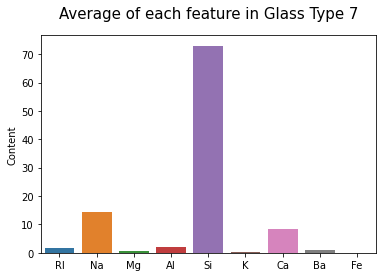

In [126]:
df5 = pd.DataFrame(data = data[data.Type==7].mean(), index=data.columns)
df5 = df5.drop('Type', axis=0)
plt.title("Average of each feature in Glass Type 7", y=1.05, fontsize=15)
sns.barplot(x=df5.index, y=df5.iloc[:,0])
plt.ylabel('Content')

**Dependency of Target variable on diff Features**

In [143]:
corr = pd.DataFrame(data = data.corr().iloc[:,-1], index=data.columns)
corr

,Type
RI,-0.160140
Na,0.508837
Mg,-0.744195
Al,0.597432
Si,0.147725
K,-0.012455
Ca,0.002677
Ba,0.574896
Fe,-0.191090
Type,1.000000


Text(0.5, 1.05, 'Correlation plot of Target variable(Type) with other features')

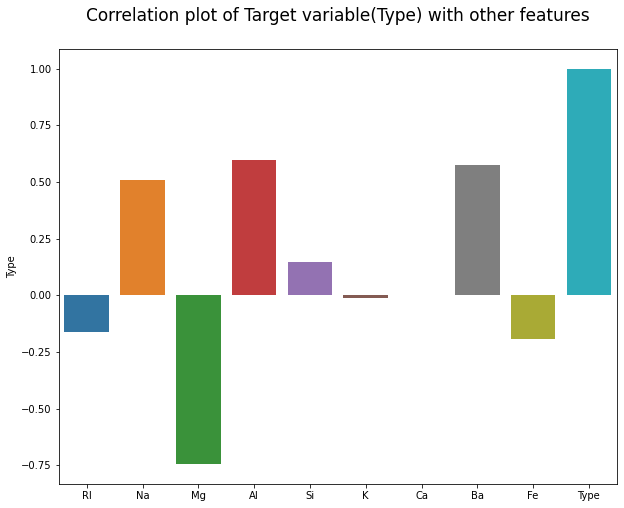

In [149]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable(Type) with other features', fontsize=17, y =1.05)

In [ ]:
!pip install ppscore

In [2]:
import ppscore as pps
score = pps.matrix(data)
score[score['y']=='Type']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
9,RI,Type,0.000000,regression,True,mean absolute error,1.434579,1.619308,DecisionTreeRegressor()
19,Na,Type,0.054775,regression,True,mean absolute error,1.434579,1.356001,DecisionTreeRegressor()
29,Mg,Type,0.224171,regression,True,mean absolute error,1.434579,1.112989,DecisionTreeRegressor()
39,Al,Type,0.127704,regression,True,mean absolute error,1.434579,1.251378,DecisionTreeRegressor()
49,Si,Type,0.000000,regression,True,mean absolute error,1.434579,1.908572,DecisionTreeRegressor()
59,K,Type,0.264086,regression,True,mean absolute error,1.434579,1.055727,DecisionTreeRegressor()
69,Ca,Type,0.000000,regression,True,mean absolute error,1.434579,1.770609,DecisionTreeRegressor()
79,Ba,Type,0.309571,regression,True,mean absolute error,1.434579,0.990475,DecisionTreeRegressor()
89,Fe,Type,0.000000,regression,True,mean absolute error,1.434579,1.780845,DecisionTreeRegressor()
99,Type,Type,1.000000,predict_itself,True,None,0.000000,1.000000,None


Text(0.5, 1.05, 'PPScore of each feature with Target Variable(Type)')

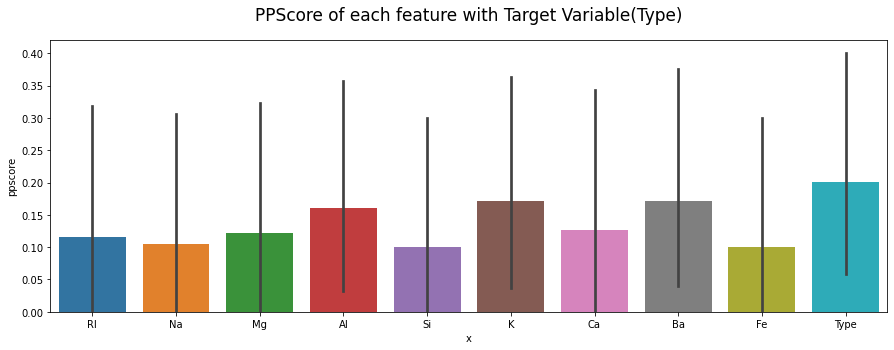

In [7]:
fig, ax=plt.subplots(figsize=(15,5))
sns.barplot(x = score.x, y = score.ppscore)
plt.title('PPScore of each feature with Target Variable(Type)', fontsize=17, y=1.05)

**Data Preprocessing**

In [8]:
#drop the duplicate value in data
data= data.drop_duplicates()
data.shape

(213, 10)

Get and remove outliers we get in our data by **Isolation Forest.**

In [10]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=data.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:10])
data1[data1['anamoly']==-1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,anamoly
106,1.53125,10.73,0.00,2.1,69.81,0.58,13.30,3.15,0.28,2,-1
107,1.53393,12.30,0.00,1.0,70.16,0.12,16.19,0.00,0.24,2,-1
163,1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.20,0.00,5,-1


In [11]:
#drop these outliers
data = data.drop([106,107,163], axis=0)

In [12]:
data.shape

(210, 10)

Spliting the data into independent features and Target variable

In [13]:
x=data.drop('Type', axis=1)
y=data['Type']

In [58]:
#Normalize the data
scaler = MinMaxScaler()
#Standardize the data
std = StandardScaler()


x_norm = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)        #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)            #data between -1 to +1 

**Build the Model**

In [67]:
#K Nearest Neighbor Clssification on normalized data

#to get best number of neghbors
kfold = KFold(n_splits=100)
n_neighbors = np.array(range(1,50))               #get accuracy scores for 1<=k<=50, and select the one with highest accuracy.
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=kfold)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.675
{'n_neighbors': 3}


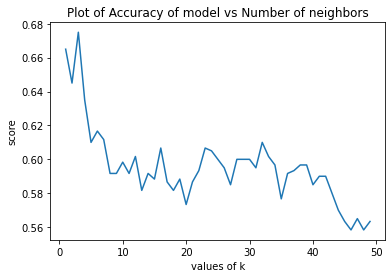

In [60]:
#Visual Representation

#get scores for k between 1 to 50.
k_range=range(1,50)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=kfold)
  k_score.append(scores.mean())
#plot score to k
plt.plot(k_range, k_score)  
plt.xlabel("values of k")
plt.ylabel("score")
plt.title("Plot of Accuracy of model vs Number of neighbors")
plt.show()

In [61]:
pred=grid.predict(x)

In [68]:
pred

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3,
       1, 3, 2, 3, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 6, 6, 6, 6,
       2, 6, 6, 2, 6, 7, 7, 1, 2, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [62]:
pd.crosstab(pred,y)

Type,1,2,3,5,6,7
row_0,,,,,,
1,62,9,8,0,0,1
2,6,62,3,2,2,1
3,1,2,6,0,0,0
5,0,1,0,10,0,1
6,0,0,0,0,7,1
7,0,0,0,0,0,25
